In [2]:
!apt install jython
!pip install python-igraph -q
!pip install giotto-tda -q
!pip install cechmate -q
!pip install leidenalg -q

In [2]:
!git clone https://github.com/lordgrilo/Holes.git

Cloning into 'Holes'...
remote: Enumerating objects: 436, done.
remote: Total 436 (delta 0), reused 0 (delta 0), pack-reused 436
Receiving objects: 100% (436/436), 11.54 MiB | 15.17 MiB/s, done.
Resolving deltas: 100% (200/200), done.


In [2]:
import pickle
G = pickle.load(open('igraph_scomplex.pkl','rb'))

In [21]:
k = G.to_networkx()
# Vertices and edges of original Mapper graph
len(k.nodes), len(k.edges)

(10767, 44153)

In [41]:
import leidenalg
part = leidenalg.find_partition(G,leidenalg.CPMVertexPartition,resolution_parameter=0.05, n_iterations=-1)
g = part.cluster_graph()
# Vertices and edges of reduced graph
len(g.vs), len(g.es)

(1122, 127)

In [ ]:
from gtda.homology import FlagserPersistence
flag = FlagserPersistence(directed=False)
adj = nx.convert_matrix.to_numpy_array(g.to_networkx())
flag.fit_transform_plot([adj])
# Not enough RAM - computation stopped

In [70]:
from gtda.homology import SparseRipsPersistence
import networkx as nx
rips = SparseRipsPersistence(metric='precomputed')
adj = g.get_adjacency_sparse()
rips.fit_transform_plot([adj.todense()])

RuntimeError: ignored

In [75]:
import Holes as ho
f = g.to_networkx()
nx.set_edge_attributes(f,1,'weight')
k = G.to_networkx()
nx.set_edge_attributes(k,1,'weight')
cliqueDict = ho.standard_weight_clique_rank_filtration(f)
pickle.dump(cliqueDict,open('cliqueDict.pkl','wb'))
ho.persistent_homology_calculation('cliqueDict.pkl',2,'data_','homology')

Preliminary scan of edge weights to define filtration steps...
Constructing filtration...
Max filtration value: 0
Clique dictionary created.
Calling: jython  /content/Holes/jython_utils/persistent_homology_calculation.py cliqueDict.pkl 2 homology data__ /content/Holes/jython_utils/lib False


Child returned -255


In [73]:
def plexToPhat(simplicesDict):
  import ast
  simplices = []
  for simpl,time in simplicesDict.items():
    simplices.append((ast.literal_eval(simpl),int(time[0])))
  return simplices

In [76]:
from cechmate import phat_diagrams
cliqueDict = pickle.load(open('cliqueDict.pkl','rb'))
simplices = plexToPhat(cliqueDict)
phat_diagrams(simplices)
# Empty diagrams

Constructing boundary matrix...
Finished constructing boundary matrix (Elapsed Time 0.00199)
Computing persistence pairs...
Finished computing persistence pairs (Elapsed Time 0.000467)


[]

In [10]:
!git clone https://github.com/aditya-grover/node2vec.git

Cloning into 'node2vec'...
remote: Enumerating objects: 108, done.
remote: Total 108 (delta 0), reused 0 (delta 0), pack-reused 108
Receiving objects: 100% (108/108), 51.58 KiB | 880.00 KiB/s, done.
Resolving deltas: 100% (39/39), done.


In [5]:
# k f
def graph2edgelist(graph,weighted=False):
  with open('graph.edgelist','w') as el:
    for u,v in graph.edges():
      el.write(f'{u} {v}\n')

In [42]:
f = g.to_networkx()
k = G.to_networkx()
graph2edgelist(f)

In [ ]:
!pip install 2to3
!2to3 -w node2vec/src/main.py
!2to3 -w node2vec/src/node2vec.py

In [46]:
!python node2vec/src/main.py --help

usage: main.py [-h] [--input [INPUT]] [--output [OUTPUT]]
               [--dimensions DIMENSIONS] [--walk-length WALK_LENGTH]
               [--num-walks NUM_WALKS] [--window-size WINDOW_SIZE]
               [--iter ITER] [--workers WORKERS] [--p P] [--q Q] [--weighted]
               [--unweighted] [--directed] [--undirected]

Run node2vec.

optional arguments:
  -h, --help            show this help message and exit
  --input [INPUT]       Input graph path
  --output [OUTPUT]     Embeddings path
  --dimensions DIMENSIONS
                        Number of dimensions. Default is 128.
  --walk-length WALK_LENGTH
                        Length of walk per source. Default is 80.
  --num-walks NUM_WALKS
                        Number of walks per source. Default is 10.
  --window-size WINDOW_SIZE
                        Context size for optimization. Default is 10.
  --iter ITER           Number of epochs in SGD
  --workers WORKERS     Number of parallel workers. Default is 8.
  --p P     

In [67]:
!python node2vec/src/main.py --dimensions 2 --input graph.edgelist --output graph.emd

Walk iteration:
('1', '/', '10')
('2', '/', '10')
('3', '/', '10')
('4', '/', '10')
('5', '/', '10')
('6', '/', '10')
('7', '/', '10')
('8', '/', '10')
('9', '/', '10')
('10', '/', '10')


In [14]:
import numpy as np
def emd2numpy(emdFile):
  with open(emdFile,'r') as f:
    emd=f.readlines()
  print(emd[0])
  size=(int(emd[0].split(' ')[0]),int(emd[0].split(' ')[1]))
  X = np.zeros(size)
  for i,line in enumerate(emd[1:]):
    splt = [float(n) for n in line.split(' ')]
    X[i] = splt[1:]
  return X

In [17]:
!pip install ripser -q
from ripser import ripser
from persim import plot_diagrams

In [68]:
X = emd2numpy('graph.emd')

124 2



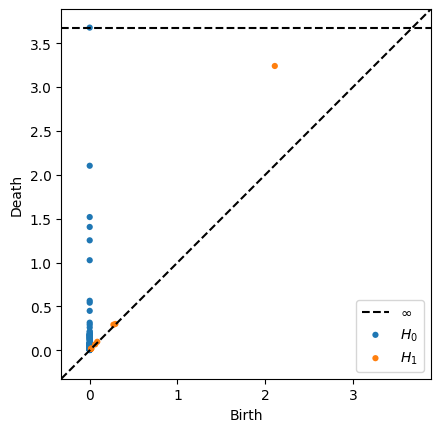

In [69]:
dgms = ripser(X,maxdim=1,distance_matrix=False)['dgms']
plot_diagrams(dgms)